## Chapter 2 Multi-armed Bandits

The most important feature distinguishing reinforcement learning from other types of learning is that it uses training information that evaluates the actions taken rather than instructsby giving correct actions.

+ Purely evaluative feedback indicates how good the action taken was, but not whether it was the best or the worst actionpossible. 

+ Purely instructive feedback, on the other hand, indicates the correct action totake, independently of the action actually taken.

+ Evaluative feedback depends entirely on the action taken, whereas instructive feedback is independent of the action taken.

## how to compute Q(a)

The action-value function Q(a) represents the expected cumulative reward when choosing action a in a given state and following a policy thereafter.

1. In Tabular Methods (e.g., Q-Learning):

If the state and action spaces are small, you can maintain a Q-table, where each entry Q(s, a) is updated iteratively based on experience.

Q-Learning Update Rule:
$$
Q(s, a) \leftarrow Q(s, a) + \alpha \left[ r + \gamma \max_{a{\prime}} Q(s{\prime}, a{\prime}) - Q(s, a) \right]
$$

$s$, a: Current state and action.

$r$: Immediate reward.

$s{\prime}$: Next state.

$a{\prime}$: Next action.

$\alpha$: Learning rate (how much to update).

$\gamma$: Discount factor (how much future rewards matter).


In [1]:
import numpy as np

# Initialize Q-table with zeros
Q = np.zeros((5, 2))  # 5 states, 2 actions

# Sample experience (s, a, r, s')
state = 2
action = 1
reward = 10
next_state = 3

# Hyperparameters
alpha = 0.1  # learning rate
gamma = 0.9  # discount factor

# Q-Learning update
Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])

print(Q)

[[0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]]


2. In Deep Q-Network (DQN):

When the state space is large or continuous (e.g., images from Atari games), a neural network is used to approximate the Q-function.
$$
Q(s, a; \theta) \approx \text{Neural Network}
$$

Input: State s.
Output: Q-values for all possible actions.

⸻

DQN Loss Function:
$$
L(\theta) = \big( y_{\text{target}} - Q(s, a; \theta) \big)^2
$$
where the target is:
$$
y_{\text{target}} = r + \gamma \max_{a{\prime}} Q(s{\prime}, a{\prime}; \theta^{-})
$$

$\theta^{-}$ is the target network, a stable copy of the current Q-network.

⸻

3. Exploration Strategy:

To estimate Q(a) accurately, the agent needs to explore the environment. This is where strategies like ε-greedy come in, which balances exploration (trying new actions) and exploitation (choosing the best action so far).

If you maintain estimates of the action values, then at any time step there is at leastone action whose estimated value is greatest.

It refers to the action-value function Q(a), which estimates the expected reward for each action a.


	1.	Action-Value Estimation:
	•	As your RL agent interacts with the environment, it updates the value estimates for each action based on the rewards it receives.
	•	For example, in a simple multi-armed bandit problem (like slot machines), you estimate the average reward for each machine based on past trials.
	2.	At Every Time Step:
	•	At any point in time, there will always be one or more actions with the highest estimated value.
	•	For instance, if your estimates are Q(a_1) = 5, Q(a_2) = 8, and Q(a_3) = 3, the action a_2 is currently the best because it has the highest estimated value.
	3.	Handling Ties:
	•	If multiple actions have the same highest value, you can break ties randomly or apply a small perturbation to distinguish them.
	4.	Why Is This Important?
	•	In greedy policies, you select the action with the highest estimated value (exploitation).
	•	In ε-greedy policies, you sometimes explore (choose random actions) to avoid getting stuck in local optima.

**Exploitation is the right thing to do to maximize the expected reward on the onestep, but Exploration may produce the greater total reward in the long run.** 

🎯 The Problem:

You just moved to a new city and want to find the best restaurant.
+ You have three options:
1.	Restaurant A (you’ve been there once and had a great experience, so you believeit’s the best).
2.	Restaurant B (you’ve heard it’s good but haven’t tried it).
3.	Restaurant C (you know little about it).

⸻

✅ Exploitation (Greedy Action):

If you always go to Restaurant A, you are exploiting your current knowledge. This maximizes your immediate reward (a good meal), but ignores potential better options (B or C).

⸻

🔍 Exploration (Nongreedy Action):

If you try Restaurant B or C, you are exploring. You may get a worse meal in the short term, but gather new information. If one of them is actually better than A, you can exploit it repeatedly in the future, leading to higher total rewards in the long run.

⸻

⚖️ The Conflict:
+ If you always exploit, you miss better opportunities.
+ If you only explore, you waste time on bad choices.

⸻

🎲 The Strategy (ε-greedy):
+ With 90% probability, go to the best-known restaurant (exploitation).
+ With 10% probability, try a random one (exploration).

⸻

🧠 In Reinforcement Learning Terms:
+ Q(a): The estimated value of action a (like the quality of each restaurant).
+ $\epsilon$-greedy strategy: A balance between exploration and exploitation.
+ Goal: Refine your action-value estimates over time and maximize long-term rewards.

### exploitation-exploration dilemma

**Exploitation is the right thing to do to maximize the expected reward on the onestep, but Exploration may produce the greater total reward in the long run.** 

Because it is not possible both to explore and to exploit with any single action selection, one often refers to the “conflict” between exploration and exploitation.

Greedy action selection always exploits current knowledge tomaximize immediate reward;
it spends no time at all sampling apparently inferior actions to see if they might really be better. 

Why in $\epsilon$-greedy methods, the probability of selecting the optimal action converges to greater than $1 - \epsilon$ ?

1. Understanding $\epsilon$-Greedy Policy

In ε-greedy action selection:
 + With probability $\epsilon$, the agent explores (chooses a random action).
 + With probability $1 - \epsilon$, the agent exploits (chooses the best-known action).

Let’s define:
 + $a^*$ as the true optimal action.
 + $\hat{a}^*$ as the agent’s current best estimate of the optimal action (which improves over time).

---

2. Behavior as Learning Progresses

As the agent gathers more experience:
 1. Initially, the agent doesn’t know $a^*$, so it explores and refines $Q(s,a)$.
 2. Over time, the Q-values converge, and the agent correctly estimates $Q(s, a^*)$.
 3.	Eventually, $\hat{a}^* \to a^*$ (i.e., the agent’s best action matches the optimal action).

---

3. Convergence to $Probability > 1 - \epsilon$

Once the agent has correctly learned the optimal action:
 + With probability $1 - \epsilon$, it chooses the optimal action (exploitation).
 + With probability $\epsilon$, it chooses randomly among all actions.

If there are n actions:
 + The chance of picking $a^*$ during exploration is $\frac{1}{n}$.
 + So, the probability of picking the optimal action overall is:

$$
P(\text{selecting } a^*) = (1 - \epsilon) + \epsilon \cdot \frac{1}{n}
$$
Since $\frac{1}{n}$ is always positive, we get:
$$
P(\text{selecting } a^*) > 1 - \epsilon
$$

---

4. Why This Matters

This means that as the agent learns better Q-values, the probability of choosing the optimal action remains high (> $1 - \epsilon$).

Even with exploration, the agent still frequently picks the optimal action. This ensures that:
 + The agent exploits most of the time.
 + It still explores enough to refine Q-values.

 ---

Example (5 Actions, $\epsilon = 0.1$)
 + With probability 0.9, the agent picks the best-known action.
 + With probability 0.1, it randomly picks one of 5 actions ($\frac{1}{5} = 0.2$).
 + Total probability of picking the optimal action:
$$
P(a^*) = 0.9 + 0.1 \times 0.2 = 0.92
$$
So, the probability is greater than 1 - 0.1 = 0.9.

---

Conclusion

The key reason $P(a^*) > 1 - \epsilon$ is because, even when exploring, there’s always a small chance of choosing the optimal action. Over time, as Q-values converge, the agent exploits more effectively, keeping the probability of selecting the optimal action high.



Exercise 2.1 In $\epsilon$-greedy action selection, for the case of two actions and $\epsilon=0.5$, what is the probability that the greedy action is selected?

$\because$ The greedy action can be selected in two ways.
1. With probability $1 - \epsilon$ the agent exploit
2. With probability $\epsilon$ the agent explore

Plus, the size of action space is $2$

$ \therefore P(\hat{a}^*) = (1 - \epsilon) + \frac{1}{2} \times \epsilon = 0.75 $ 

### 10-armed testbed

Figure-2.1 An example bandit problem from the 10-armed testbed. The true value $q^*(a)$ of each of the ten actions was selected according to a normal distribution with mean zero and unitvariance, and then the actual rewards were selected according to a mean $q^*(a)$, unit-variancenormal distribution, as suggested by these gray distributions.


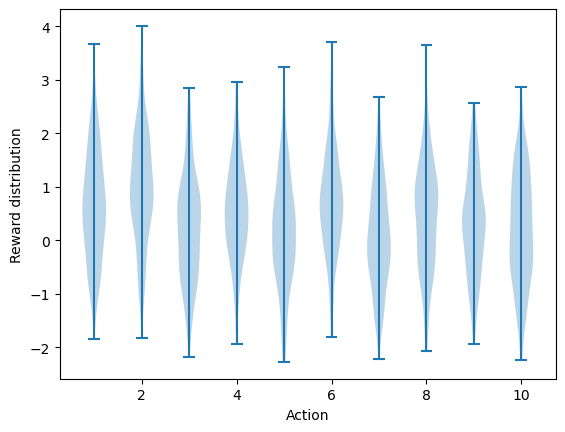

In [2]:
import numpy as np
from matplotlib import pyplot as plt

n = 10

true_action_val = np.random.rand(n) 
# sample from an normal distribution
actual_reward = np.random.randn(2000 // n, n) + true_action_val 
# sample from q*(a)-1 gaussian distribution

plt.violinplot(dataset=actual_reward)

plt.xlabel("Action")
plt.ylabel("Reward distribution")
plt.show()

Figure 2.2-1 Average performance of"-greedy action-value methods on the 10-armed testbed.These data are averages over 2000 runs with different bandit problems. All methods used sampleaverages as their action-value estimates.

<>:12: SyntaxWarning: invalid escape sequence '\e'
<>:12: SyntaxWarning: invalid escape sequence '\e'
/var/folders/pb/c6h5bqrn3_97cy1dt3yc43v00000gn/T/ipykernel_84853/2636677440.py:12: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(rewards, label='$ \epsilon = %.02f $' % (eps))
100%|██████████| 2000/2000 [00:15<00:00, 125.73it/s]


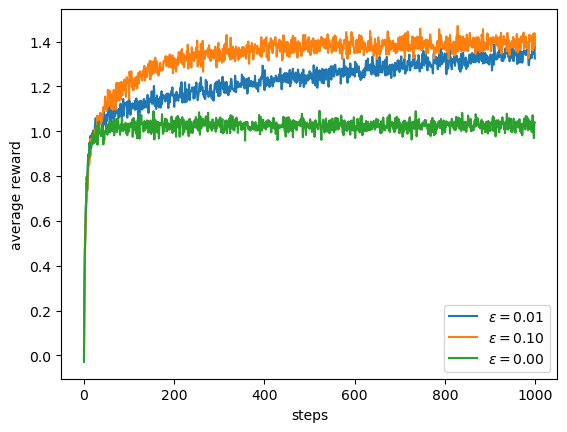

In [3]:
runs = 2000
time = 1000

from utils.bandit import Naive_Bandit as NBandit, simulate

epsilons = [0.01, 0.1, 0.0]
bandits = [NBandit(epsilon=epsilon) for epsilon in epsilons]

best_action_counts, rewards = simulate(runs, time, bandits)

for eps, rewards in zip(epsilons, rewards):
    plt.plot(rewards, label='$ \epsilon = %.02f $' % (eps))
    
plt.xlabel('steps')
plt.ylabel('average reward')
plt.legend()

Figure 2.2-2

<>:2: SyntaxWarning: invalid escape sequence '\e'
<>:2: SyntaxWarning: invalid escape sequence '\e'
/var/folders/pb/c6h5bqrn3_97cy1dt3yc43v00000gn/T/ipykernel_84853/1012392620.py:2: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(counts * 100, label='$ \epsilon = %.02f $' % (eps))


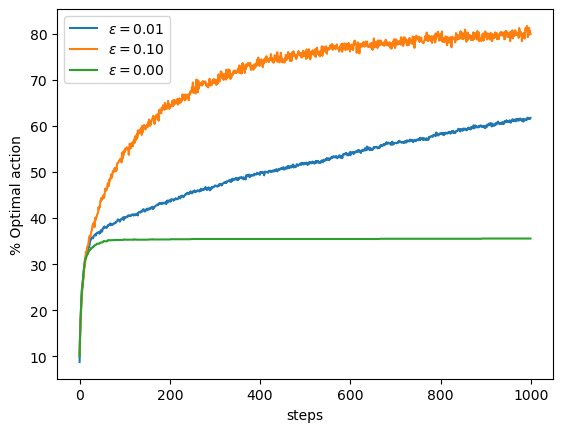

In [4]:
for eps, counts in zip(epsilons, best_action_counts):
    plt.plot(counts * 100, label='$ \epsilon = %.02f $' % (eps))
plt.xlabel('steps')
plt.ylabel('% Optimal action')
plt.legend()

Exercise 2.2: Bandit exampleConsider ak-armed bandit problem with $k=4$ actions, denoted $1, 2, 3, \text{and } 4$. Consider applying to this problem a bandit algorithm using $\epsilon$-greedy action selection, sample-average action-value estimates, and initial estimatesof $Q_1(a) = 0$, for alla. Suppose the initial sequence of actions and rewards is $A_1= 1,R_1=-1,A_2= 2,R_2= 1,A_3= 2,R_3=-2,A_4= 2,R_4= 2,A_5= 3,R_5= 0$. On someof these time steps the $\epsilon$ case may have occurred, causing an action to be selected atrandom. On which time steps did this definitely occur? On which time steps could this possibly have occurred?

Step-by-Step Analysis:

Inintially
$Q_1(1) = Q_1(2) = Q_1(3) = Q_1(4) = 0$

according to formula 2.1

$$ 
Q_t(a) = \frac{\text{sum of rewards when a taken prior to t}}{\text{number of timesataken prior to t}} = \frac{\sum_{i=1}^{t-1}R_i \cdot float(A_i == a)}{\sum_{i=1}^{t-1}float(A_i == a)}
$$

$N(1)=0,N(2)=0,N(3)=0,N(4)=0$ (Number of times each action has been taken)

$
t=1:A_1 =1,R_1=−1
$

$
N(1)=1
\newline
Q_2(1)=(−1)/1=−1
\newline
Q_2(2)=0,Q_2(3)=0,Q_2(4)=0$


Since all the other actions have a value of 0, action 1 was not neccessarily chosen randomly. It could have been chosen greedily.

$
t=2: A_2=2, R_2=1
\newline
N(2)=1
\newline
Q_3(1)=−1, Q_3(2)=1, Q_3(3)=0, Q_3(4)=0
$

Action 2 was chosen. It has the highest current value, so it could have been chosen greedily.

$
t=3: A_3=2,R_3=−2
\newline
N(2)=2
\newline
Q_4(1)=−1, Q_4(2)=(1+(−2))/2=−0.5, Q_4(3)=0, Q_4(4)=0
$

Action 2 was chosen. It has the highest value, so it could have been chosen greedily.

$
t=4: A_4=2, R_4=2
\newline
N(2)=3
\newline
Q_5(1)=−1, Q_5(2)=(1+(−2)+2)/3=1/3, Q_5(3)=0, Q_5(4)=0
$

Action 2 was chosen. It has the highest value, so it could have been chosen greedily.

$
t=5: A_5=3, R_5=0
\newline
N(3)=1
\newline
Q_6(1)=−1, Q_6(2)=1/3, Q_6(3)=0, Q_6(4)=0
$

Action 3 was chosen. Action 2 has the highest value. Therefore, action 3 was definitly chosen randomly.

Answers:

Definitely occurred:
t=5 (because action 3 was chosen when action 2 had a higher estimated value).

Possibly occurred:
t=1, 2, 3, 4 (because the actions chosen could have been the greedy choices).

### 2.4 Incremental Implementation
Memery Efficient & Compute Efficient
Only need to maintain $n$ and $Q_n$

$$

\begin{split}
Q_{n+1} & = \frac{1}{n}\sum_{i=1}^{n}R_i \\
& = \frac{1}{n}(R_n + \sum_{i = 1}^{n - 1}R_i) \\
& = \frac{1}{n}(R_n + (n - 1)\frac{1}{n - 1}\sum_{i = 1}^{n - 1}R_i) \\
& = \frac{1}{n}(R_n + (n - 1)Q_n) \\
& = \frac{1}{n}(R_n + nQ_n - Q_n) \\
& = Q_n + \frac{1}{n}(R_n - Q_n) \\
\end{split}

$$



General form
$$
NewEstimate \leftarrow OldEstimate + StepSize \cdot [Target - OldEstimate]
$$

### 2.5 Unstationary Problem
weighted average focus more on recent reward than long-past reward
$$

\begin{split}
Q_{n+1} & = Q_n + \alpha(R_n - Q_n) \\
& = \alpha R_n + (1-\alpha)Q_n \\
& = \alpha R_n + (1 - \alpha) [\alpha R_{n - 1} + (1 - \alpha) Q_{n - 1}] \\
& = \alpha R_n + (1 - \alpha) \alpha R_{n - 1} + (1 - \alpha)^2 Q_{n-1} \\
& = \alpha R_n + (1 - \alpha) \alpha R_{ n - 1} + (1 - \alpha)^2 \alpha R_{n - 2} + ... + (1 - \alpha)\alpha R_1 + (1 - \alpha)^n Q_1 \\
& = (1 - \alpha)^n Q_1 + \sum_{i=1}^{n}\alpha(1 - \alpha)^{n - i} R_i

\end{split}

$$

exponential recency-weighted average.

convergence condition 

$$
\sum_{n = 1}^{\infty} \alpha_n(a) = \infty, \sum_{n = 1}^{\infty} \alpha_n^2(a) < \infty
$$

+ The first condition means that the sum of the step-sizes must go to infinity, ensuring that learning continues.

+ The second condition means that the sum of the squared step-sizes must be finite, ensuring that the learning process stabilizes.

### 2.6  Optimistic Initial Values

biased by initial estimates. 

In [5]:
from utils.bandit import Bandit, simulate

<>:8: SyntaxWarning: invalid escape sequence '\e'
<>:9: SyntaxWarning: invalid escape sequence '\e'
<>:8: SyntaxWarning: invalid escape sequence '\e'
<>:9: SyntaxWarning: invalid escape sequence '\e'
/var/folders/pb/c6h5bqrn3_97cy1dt3yc43v00000gn/T/ipykernel_84853/1839741046.py:8: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(best_action_counts[0], label='$\epsilon = 0, q = 5$')
/var/folders/pb/c6h5bqrn3_97cy1dt3yc43v00000gn/T/ipykernel_84853/1839741046.py:9: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(best_action_counts[1], label='$\epsilon = 0.1, q = 0$')
100%|██████████| 2000/2000 [00:12<00:00, 166.49it/s]


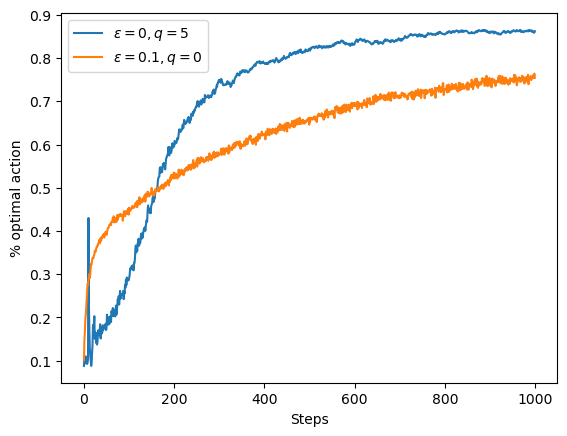

In [6]:
runs = 2000
time = 1000
bandits = []
bandits.append(Bandit(epsilon=0, initial=5, step_size=0.1))
bandits.append(Bandit(epsilon=0.1, initial=0, step_size=0.1))
best_action_counts, _ = simulate(runs, time, bandits)

plt.plot(best_action_counts[0], label='$\epsilon = 0, q = 5$')
plt.plot(best_action_counts[1], label='$\epsilon = 0.1, q = 0$')
plt.xlabel('Steps')
plt.ylabel('% optimal action')
plt.legend()

### 2.7  Upper-Confidence-Bound Action Selection

Unlike the $\epsilon$-greedy method, which explores randomly, UCB uses the uncertainty of action-value estimates to guide exploration.

#### Core Idea
+ **Optimism in the Face of Uncertainty**: UCB chooses actions based on an "optimistic" estimate of their value.

+ **Balancing Value and Uncertainty**: This optimistic estimate is calculated by adding an "uncertainty bonus" to the current action-value estimate.

+ **Quantifying Uncertainty**: The uncertainty bonus is related to how many times an action has been selected. Actions that have been selected fewer times have higher uncertainty, leading to larger bonuses.

$$
A_t = \argmax_a \Bigg[Q_t(a)+c\sqrt{\frac{lnt}{N_t(a)}} \Bigg]
$$

#### Explaination

$Q_t(a)$: This term represents the current estimate of the action's value. It encourages exploitation of actions with high estimated values.

$c\sqrt{\frac{lnt}{N_t(a)}}$: This term represents the uncertainty bonus. the square-rootterm is a measure of the uncertainty or variance in the estimate of $a$’s value

$lnt$: The natural logarithm of the time step. This term increases slowly over time, encouraging exploration early on.

$N_t(a)$: The number of times action a has been selected. Actions that have been selected fewer times have smaller $N_t(a)$ values, resulting in larger uncertainty bonuses. $N_t(a)$ increments, as it appears in the denominator, the uncertainty term decreases.  On the other hand, each time an action other thanais selected, $t$ increases but $N_t(a)$ does not; because $t$ appears in the numerator, the uncertainty estimate increases. The use of the natural logarithm means that the increases get smaller over time, but areunbounded; 

$c$: This parameter controls the strength of the exploration. A larger $c$ value increases exploration.

#### How UCB Balances Exploration and Exploitation:

+ Actions with high estimated values ($Q_t(a)$) are likely to be selected.
+ Actions with high uncertainty (low $N_t(a)$) are also likely to be selected, even if their estimated values are not very high.
+ As an action is selected more often, its uncertainty decreases, and its influence on the selection process diminishes.
+ The $log(t)$ term makes the uncertainty bonus decrease over time, so that the algorithm will exploit more and explore less as time increases.

#### Advantages of UCB:

Principled Exploration: UCB provides a more principled way to explore than $\epsilon$-greedy, as it focuses on actions with high uncertainty.

Better Performance: UCB can often achieve better performance than $\epsilon$-greedy, especially in problems with a large number of actions or in nonstationary environments.


<>:11: SyntaxWarning: invalid escape sequence '\e'
<>:11: SyntaxWarning: invalid escape sequence '\e'
/var/folders/pb/c6h5bqrn3_97cy1dt3yc43v00000gn/T/ipykernel_84853/1992897629.py:11: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(average_rewards[1], label='epsilon greedy $\epsilon = 0.1$')
100%|██████████| 2000/2000 [00:11<00:00, 168.82it/s]


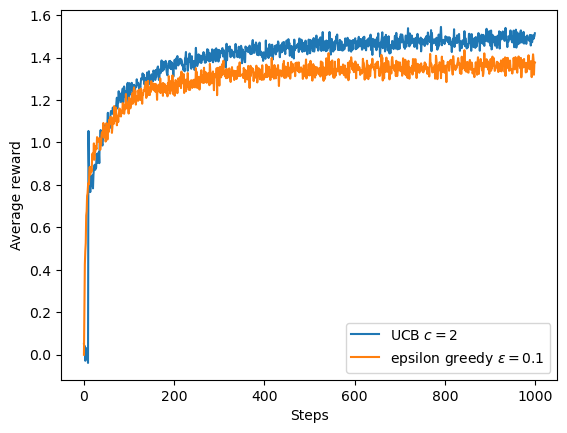

In [7]:
runs = 2000
time = 1000

bandits = []
bandits.append(Bandit(epsilon=0, UCB_param=2, sample_averages=True))
bandits.append(Bandit(epsilon=0.1, sample_averages=True))

_, average_rewards = simulate(runs, time, bandits)

plt.plot(average_rewards[0], label='UCB $c = 2$')
plt.plot(average_rewards[1], label='epsilon greedy $\epsilon = 0.1$')

plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.legend()

Exercise 2.8: UCB SpikesIn Figure 2.4 the UCB algorithm shows a distinct spikein performance on the 11th step. Why is this? Note that for your answer to be fullysatisfactory it must explain both why the reward increases on the 11th step and why itdecreases on the subsequent steps. Hint: If $c$ = 1, then the spike is less prominent.

The spike at the 11th step is a result of the UCB algorithm's exploration strategy, specifically how it balances estimated values and uncertainty.

#### Explanation:

##### Initial Exploration:
+ In the early steps, UCB encourages exploration due to the high uncertainty associated with all actions.

+ The algorithm tries each action a few times to get initial estimates.
##### Finding a High-Reward Action:
+ At some point, the algorithm will likely encounter a high-reward action. The exact timing depends on the random rewards, and the constant 'c'.

+ Because of the UCB algorithm, actions that have been chosen less often have a higher probability of being chosen.

##### The Spike at Step 11:
+ The spike at the 11th step indicates that the algorithm, due to the UCB calculation, selected an action that gave a very high reward.

+ This happened because the uncertainty bonus allowed an action, that had not been selected enough, to be selected. The reward of that action was higher than the current best estimate.

+ The UCB algorithm effectively "discovered" a particularly rewarding action at this moment.

##### The Subsequent Decrease:
+ After the spike, the algorithm continues to select the high-reward action, but the uncertainty associated with it decreases.

+ As the action is selected more frequently, the $N_t(a)$ term in the UCB formula increases, reducing the uncertainty bonus.

+ Other actions, which had not been selected as much, now have a higher uncertainty bonus.
+ Therefore, the algorithm starts to explore again, and the average reward decreases, as it's testing other actions.

+ Because the algorithm is now exploring, the average reward will be less than the large spike that was caused by the lucky action.

##### Effect of 'c':
+ The parameter 'c' controls the degree of exploration.

+ If 'c' is smaller (e.g., c=1), the uncertainty bonus is reduced, leading to less pronounced exploration.

+ Therefore, the spike is less prominent, because the uncertainty is less of a factor in the action selection.

+ With a larger 'c' the uncertainty is a larger factor, and therefore exploration is more aggressive.

##### In essence:
+ The spike at the 11th step is a result of a lucky exploration, where the UCB algorithm discovered a high-reward action due to its uncertainty-driven exploration. 

+ The subsequent decrease is due to the algorithm reverting to exploration, as the uncertainty of other actions increases.

### 2.8  Gradient Bandit Algorithms

learning a numerical *preferencefor* each action a, denoted as $H_t(a)$

The larger the preference, the more often that action is taken, but the preference has no interpretation in terms of reward. Only the relativepreference of one action over another is important.

which are determined according to a soft-max distribution:

$$
Pr\{A_t = a\} = \frac{e^{H_t(a)}}{\sum_{b=1}^{k}e^{H_t(a)}} = \pi_t(a)
$$

$\pi_t(a)$ denotes the probability of taking actionaat time $t$.

Initially all action preferences are the same (e.g.,$H_1(a) = 0$, for all $a$) so that all actions have an equal probability of being selected.

Exercise 2.9 Show that in the case of two actions, the soft-max distribution is the same as that given by the logistic, or sigmoid, function often used in statistics and artificialneural networks

#### Stochastic Gradient Ascend

100%|██████████| 2000/2000 [00:24<00:00, 80.58it/s]


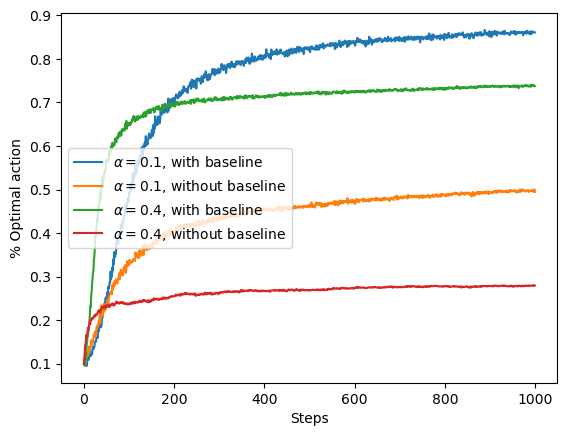

In [8]:
runs = 2000
time = 1000

bandits = []
bandits.append(Bandit(gradient=True, step_size=0.1, gradient_baseline=True, true_reward=4))
bandits.append(Bandit(gradient=True, step_size=0.1, gradient_baseline=False, true_reward=4))
bandits.append(Bandit(gradient=True, step_size=0.4, gradient_baseline=True, true_reward=4))
bandits.append(Bandit(gradient=True, step_size=0.4, gradient_baseline=False, true_reward=4))
best_action_counts, _ = simulate(runs, time, bandits)
labels = [r'$\alpha = 0.1$, with baseline',
            r'$\alpha = 0.1$, without baseline',
            r'$\alpha = 0.4$, with baseline',
            r'$\alpha = 0.4$, without baseline']

for i in range(len(bandits)):
    plt.plot(best_action_counts[i], label=labels[i])
plt.xlabel('Steps')
plt.ylabel('% Optimal action')
plt.legend()